<H3 style="color:teal;"><p style="font-family:Georgia;">Aim of the Artefact</H3>
<body>    
<p style="font-family:Georgia;">To create, construct, train, assess, and forecast the outcomes of product recommendation models using machine learning
</p>


<body>    
<ol style="font-family:Georgia;"><li>Importing Libraries</li>
<li>Importing Dataset</li>
<li>Exploratory Data Analysis</li>
<li>Data Augumentation</li>
<li>Data Preprocessing</li>
<li>Loading Data Features</li>
<li>Model Implemetation</li>
<li>Model Training</li>
<li>Data Augumentation Technique</li>
<li>Table for comparison of Metrics without Augumentation</li>
<li>able for comparison of Metrics with Augumentation</li>
<li>Determining Best Prediction Model</li>

<li> NER Implementation</li>
    </ol>

### 1. Importing Libraries

In [1]:
# pip install -U imbalanced-learn > nul 2>&1
# %pip install tabulate

In [2]:
# Data Analysis
import pandas as pd
import numpy as np

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

# Pre-Processing Data
from sklearn import preprocessing

# Train Test Split
from sklearn.model_selection import train_test_split

# StandardScalar 
from sklearn.preprocessing import StandardScaler

# Models Implementation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# SMOTE Analysis
from imblearn.over_sampling import SMOTE

# Implmentation of Decision Tree
from sklearn import tree

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support
# from sklearn.metrics import classification_report

# For table of comparison
from tabulate import tabulate


# Natural Language Processing
import nltk

nltk.download('punkt', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('maxent_ne_chunker', quiet=True)
nltk.download('words', quiet=True)

# Removing the Warnings
import warnings
warnings.filterwarnings('ignore')


### 2. Loading Dataset

In [3]:
data = pd.read_csv('flipkart_com-ecommerce_sample.csv')
data

uniq_id            crawl_timestamp  \
0      c2d766ca982eca8304150849735ffef9  2016-03-25 22:59:23 +0000   
1      7f7036a6d550aaa89d34c77bd39a5e48  2016-03-25 22:59:23 +0000   
2      f449ec65dcbc041b6ae5e6a32717d01b  2016-03-25 22:59:23 +0000   
3      0973b37acd0c664e3de26e97e5571454  2016-03-25 22:59:23 +0000   
4      bc940ea42ee6bef5ac7cea3fb5cfbee7  2016-03-25 22:59:23 +0000   
...                                 ...                        ...   
19997  93e9d343837400ce0d7980874ece471c  2015-12-01 10:15:43 +0000   
19998  669e79b8fa5d9ae020841c0c97d5e935  2015-12-01 10:15:43 +0000   
19999  cb4fa87a874f715fff567f7b7b3be79c  2015-12-01 10:15:43 +0000   
20000                               NaN                        NaN   
20001                               NaN                        NaN   

                                             product_url  \
0      http://www.flipkart.com/alisha-solid-women-s-c...   
1      http://www.flipkart.com/fabhomedecor-fabric-do...   
2      http://www.flipkart.com/aw-bellies/p/itmeh4grg...   
3      http://www.flipkart.com/alisha-solid-women-s-c...   
4      http://www.flipkart.com/sicons-all-purpose-arn...   
...                                                  ...   
19997  http://www.flipkart.com/elite-collection-mediu...   
19998  http://www.flipkart.com/elite-collection-mediu...   
19999  http://www.flipkart.com/elite-collection-mediu...   
20000                                                NaN   
20001                                                NaN   

                                  product_name  \
0          Alisha Solid Women's Cycling Shorts   
1          FabHomeDecor Fabric Double Sofa Bed   
2                                   AW Bellies   
3          Alisha Solid Women's Cycling Shorts   
4        Sicons All Purpose Arnica Dog Shampoo   
...                                        ...   
19997  Elite Collection Medium Acrylic Sticker   
19998  Elite Collection Medium Acrylic Sticker   
19999  Elite Collection Medium Acrylic Sticker   
20000                                      NaN   
20001                                      NaN   

                                   product_category_tree               pid  \
0      ["Clothing >> Women's Clothing >> Lingerie, Sl...  SRTEH2FF9KEDEFGF   
1      ["Furniture >> Living Room Furniture >> Sofa B...  SBEEH3QGU7MFYJFY   
2      ["Footwear >> Women's Footwear >> Ballerinas >...  SHOEH4GRSUBJGZXE   
3      ["Clothing >> Women's Clothing >> Lingerie, Sl...  SRTEH2F6HUZMQ6SJ   
4      ["Pet Supplies >> Grooming >> Skin & Coat Care...  PSOEH3ZYDMSYARJ5   
...                                                  ...               ...   
19997  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE7VAYDKQZEBSD   
19998  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE8YSVEPPCZ42Y   
19999  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  STIE88KN9ZDSGZKY   
20000                                                NaN               NaN   
20001                                                NaN               NaN   

       retail_price  discounted_price  \
0             999.0             379.0   
1           32157.0           22646.0   
2             999.0             499.0   
3             699.0             267.0   
4             220.0             210.0   
...             ...               ...   
19997        1299.0             999.0   
19998        1499.0            1199.0   
19999        1499.0             999.0   
20000           NaN               NaN   
20001           NaN               NaN   

                                                   image  \
0      ["http://img5a.flixcart.com/image/short/u/4/a/...   
1      ["http://img6a.flixcart.com/image/sofa-bed/j/f...   
2      ["http://img5a.flixcart.com/image/shoe/7/z/z/r...   
3      ["http://img5a.flixcart.com/image/short/6/2/h/...   
4      ["http://img5a.flixcart.com/image/pet-shampoo/...   
...                                                  ...   
19997  ["http://img

In [4]:
# Copying the data in d1 variable
d1 = data

In [5]:
# Finding null values
d1.isnull().sum();

In [6]:
# Dropping the null values
d1 = d1.dropna()
d1.isnull().sum()

uniq_id                    0
crawl_timestamp            0
product_url                0
product_name               0
product_category_tree      0
pid                        0
retail_price               0
discounted_price           0
image                      0
is_FK_Advantage_product    0
description                0
product_rating             0
overall_rating             0
brand                      0
product_specifications     0
dtype: int64

### 3. EDA

In [70]:
import plotly.io as pio
pio.renderers.default = 'vscode'

In [71]:
# Plotting the Ratings given to Product
fig = px.histogram(data_frame=d1, x='product_rating')
fig.update_layout(width=600,  height=600 )
fig.show()

In [72]:
# Plotting the Retail price and discounted price
fig=px.scatter(d1,x='retail_price', y='discounted_price')
fig.update_layout(width=600,  height=600 )
fig.show()

In [73]:
# Distribution of Brand by Discounted Price
fig = px.box(d1, x='brand', y='discounted_price')
fig.update_layout(
    title='Distribution of Brand by Discounted Price'
)
fig.update_xaxes(tickangle=45)
fig.update_layout(width=600,  height=600)
fig.show()

In [74]:
# Heatmap of Features
fig = px.imshow(d1.corr(), color_continuous_scale='RdBu_r')
fig.update_layout(title='Correlation Heatmap', xaxis_title='Features', yaxis_title='Features')
fig.update_xaxes(side='top')
fig.update_layout(width=600,  height=600 )
fig.show()

### 4. Generating Labels 

In [11]:
# Dropping the Nan values
df = d1.dropna()

#### Description to generate_labels function
By dividing the "product_category_tree" column on ">>" and choosing the first member, the function first adds a new column called "label" to the DataFrame df. Then, any whitespace that appears before or after the first two characters is eliminated.
The top categories are then obtained, chosen based on the index, and saved in the top_categories variable using the value counts from the 'label' column.
The procedure returns the DataFrame after filtering it to keep only the rows in the top_categories where the 'label' column exists

In [12]:
# Function to generate labels
def generate_label(df,top):
    df['label']=df['product_category_tree'].apply(lambda x: x.split('>>')[0][2:].strip())
    top_categories = df['label'].value_counts().nlargest(top).index
    df = df[df['label'].isin(top_categories)]
    return df

#### Description to seperating labels block
The number of distinct values in the 'product_category_tree' column of the DataFrame df is the first step in determining the number of unique values. The top variable is set to a minimum of 90.
The generated DataFrame is then saved in the variable d1 after being supplied as arguments with the variables df and top to the generate_label function.

The index containing the distinct labels produced by the generate_label function is then chosen using the value counts of the d1 column's "label" column. The generated_labels variable contains these labels.
The generated_labels variable is then printed to the terminal. This function simply extracts the top 90 categories from the DataFrame df's 'product_category_tree' column, producing a list of unique labels 


In [13]:
# Seperating the labels
unique_labels = len(df['product_category_tree'].unique())
top = min(unique_labels,90)
d1 = generate_label(df,top)
generated_labels = d1['label'].value_counts().index
print(generated_labels)

Index(['Jewellery', 'Clothing', 'Mobiles & Accessories', 'Automotive',
       'Home Decor & Festive Needs', 'Home Furnishing', 'Computers',
       'Baby Care', 'Tools & Hardware', 'Footwear', 'Kitchen & Dining',
       'Furniture', 'Pens & Stationery', 'Beauty and Personal Care',
       'Bags, Wallets & Belts', 'Sports & Fitness', 'Toys & School Supplies',
       'Home Improvement', 'Cameras & Accessories', 'Watches',
       'Health & Personal Care Appliances', 'Sunglasses', 'Gaming',
       'Pet Supplies', 'Home & Kitchen', 'Home Entertainment', 'Eyewear',
       'Clovia Women's Full Coverage Bra"]',
       'Vishudh Printed Women's Straight Kurta"]',
       'Lilliput Top Baby Girl's  Combo"]', 'Olvin Aviator Sunglasses"]',
       'Clovia Women's T-Shirt Bra"]', 'MASARA Solid Women's Straight Kurta"]',
       'Pu-Good Women Flats"]',
       'Firangi Cotton, Polyester Free Floor Mat Firangi..."]',
       'Olvin Wayfarer Sunglasses"]', 'Dressberry Gold Synthetic  Clutch"]',
       'House

In [14]:
# Counting the number of values for each label
label_counts = d1['label'].value_counts()
print(label_counts)

Jewellery                                                3521
Clothing                                                 3129
Mobiles & Accessories                                    1096
Automotive                                               1010
Home Decor & Festive Needs                                859
                                                         ... 
Amita Home Furnishing Cotton Floral Single Bedsh..."]       1
Linzina Fashions LIN-HOSS-1.5 Faucet Set"]                  1
Legmark Slim Fit Women's Blue Jeans"]                       1
Dolz Slim Fit Fit Women's Brown Jeans"]                     1
Sj Bushnell 119M / 1000 Binoculars (36 mm, Black)"]         1
Name: label, Length: 90, dtype: int64


#### Value counts of the 'label' column
Using the code below, the dataframe d1 is filtered so that only the rows with a count more than or equal to min_count for which the label_counts index contains a value for the 'label' column are retained.



The pandas Series label_counts is where the value counts of the 'label' column are supposed to be kept. Only labels with counts greater than or equal to the minimum count are selected by Label_counts[label_counts>=min_count], and the matching index values are selected by Index.index.

As such, the method eliminates any labels in the 'label' column of d1 that appear less frequently than min_count times. Only the rows with the label present at least min_count times are included in the final DataFrame, d1.


In [15]:
# Seperating the label with values more than 20
min_count = 20
d1 =d1[d1['label'].isin(label_counts[label_counts>=min_count].index)]
print(d1)

                                uniq_id            crawl_timestamp  \
0      c2d766ca982eca8304150849735ffef9  2016-03-25 22:59:23 +0000   
1      7f7036a6d550aaa89d34c77bd39a5e48  2016-03-25 22:59:23 +0000   
2      f449ec65dcbc041b6ae5e6a32717d01b  2016-03-25 22:59:23 +0000   
3      0973b37acd0c664e3de26e97e5571454  2016-03-25 22:59:23 +0000   
4      bc940ea42ee6bef5ac7cea3fb5cfbee7  2016-03-25 22:59:23 +0000   
...                                 ...                        ...   
19995  7179d2f6c4ad50a17d014ca1d2815156  2015-12-01 10:15:43 +0000   
19996  71ac419198359d37b8fe5e3fffdfee09  2015-12-01 10:15:43 +0000   
19997  93e9d343837400ce0d7980874ece471c  2015-12-01 10:15:43 +0000   
19998  669e79b8fa5d9ae020841c0c97d5e935  2015-12-01 10:15:43 +0000   
19999  cb4fa87a874f715fff567f7b7b3be79c  2015-12-01 10:15:43 +0000   

                                             product_url  \
0      http://www.flipkart.com/alisha-solid-women-s-c...   
1      http://www.flipkart.com/fabhomed

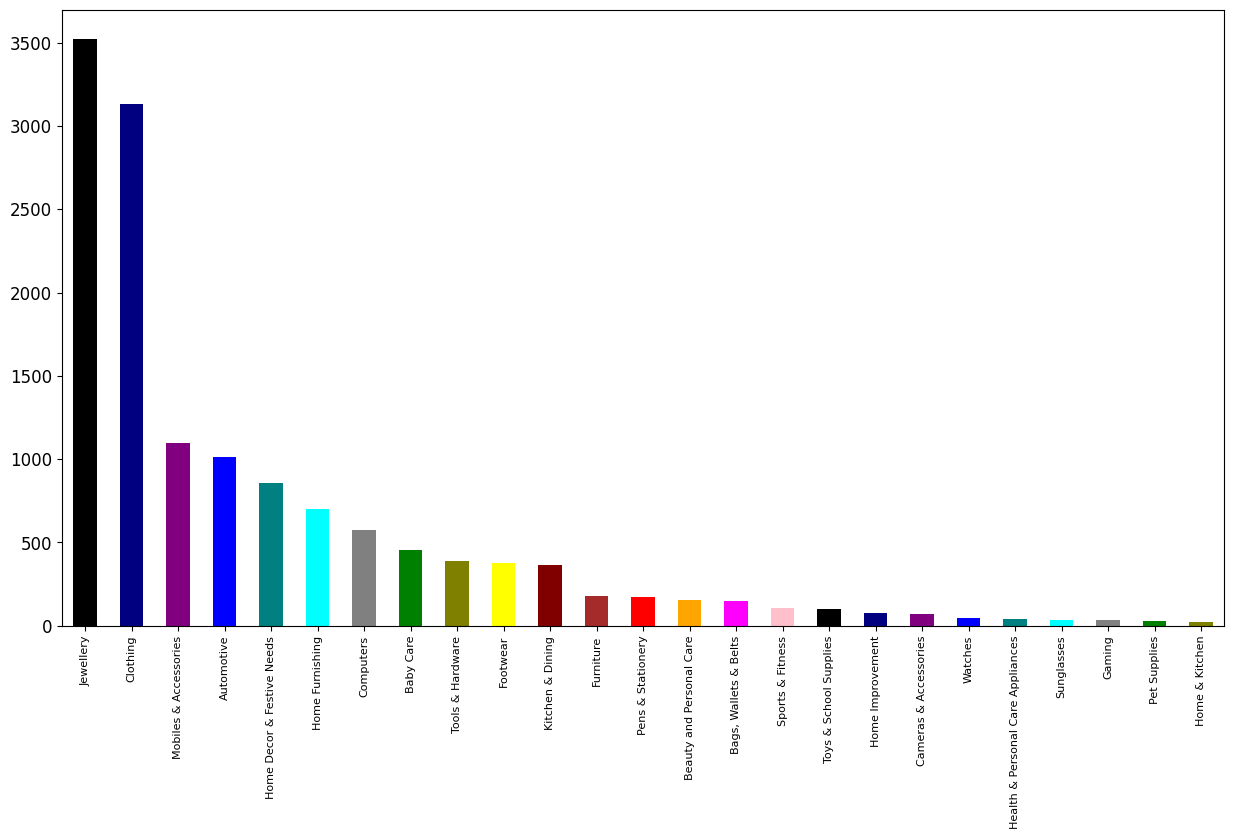

In [16]:
# Plotting the values of Labels
colors = ['black','navy','purple','blue','teal','cyan','gray','green','olive','yellow','maroon','brown','red','orange','magenta','pink']
plt.figure(figsize=(15,8))
d1['label'].value_counts().sort_values(ascending=False).plot(kind='bar',color=colors)
plt.yticks(fontsize=12)
plt.xticks(fontsize=8, rotation=90)
plt.show()

#### Description of recommend_products_by_label function
At first, the function limits the items in the DataFrame to those that have the specified label. It creates a new DataFrame named filtered_df, containing only the rows in the 'label' column that have a label.

Based on user feedback, the top 5 products from filtered_df are then recommended. The filtered_df DataFrame is arranged in decreasing order using the 'product_rating' column. The first 5 rows are selected using.head(5), and the resulting DataFrame is stored in top_5_products.

Then, to create a list of the names of the recommended products, the 'product_name' column of the top_5_products is chosen, list() is used to create a list, and the function returns the list. 


In [17]:
# Function to Recommend the products
def recommend_products_by_label(df, label):
    # Filter the dataframe to include only the products with the specified label
    filtered_df = df[df['label'] == label]
    
    # Recommend the top 5 products based on their rating
    top_5_products = filtered_df.sort_values('product_rating', ascending=False).head(5)
    recommended_products = list(top_5_products['product_name'])
    
    return recommended_products

#### Explanation to check_recommendations function
The function initially restricts the products in the DataFrame to those with the provided label. It generates a fresh DataFrame called filtered_df with just the rows with label in the 'label' column.
The products stored in filtered_df are then sorted by customer rating in descending order, and the resultant DataFrame is kept in sorted_products.

Finally, it verifies that all of the suggested products are among the top 5 sellers for the given label. To achieve this, it chooses the 'product_name' column from the first five rows of sorted_products, turns it into a list using list(), and then uses the all() method to see if the recommended_products products are all included in this list. It returns True if all suggested products are among the top 5 rated items and False otherwise.


In [18]:
# Function to check recommendations
def check_recommendations(df, label, recommended_products):
    # Filter the dataframe to include only the products with the specified label
    filtered_df = df[df['label'] == label]
    
    # Sort the products by their rating
    sorted_products = filtered_df.sort_values('product_rating', ascending=False)
    
    # Check if the recommended products are in the top 5 rated products for the label
    is_correct = all(product in list(sorted_products['product_name'][:5]) for product in recommended_products)
    
    return is_correct

#### Explanation to generation of labels
Using the input() method, the code asks the user to submit a label for which product recommendations are required. The user's input is then saved in the label variable.

It then uses the DataFrame d1 and the label input to call the recommend_products_by_label() function to obtain a list of suggested products for the given label, which it then saves in the recommended_products variable.

Finally, a for loop and the enumerate() function are used to output the top 5 prodcuts that are suggested for the given label. Using the print() method, it iterates through the recommended_products list and outputs the product names along with their rankings (beginning at 1).

In [19]:
# Take the label and generate the results
label = input("Enter a label to recommend products for: ")
recommended_products = recommend_products_by_label(d1, label)
print(f"Top 5 recommended products for {label}:")
for i, product in enumerate(recommended_products):
    print(f"{i+1}. {product}")

Top 5 recommended products for :


#### Checking the generated labels
The below block of code checks if the generated labels are correct or not. If the generateg label in present in the label list then the statement is printed that the "The recommended products are correct." else "The recommended products are incorrect"

In [20]:
# Check if the generated label is correct or wrong
is_correct = check_recommendations(d1, label, recommended_products)
if is_correct:
    print("The recommended products are correct!")
else:
    print("The recommended products are incorrect!")

The recommended products are correct!


### Data Preprocessing

In [21]:
# Columns of the dataset
data.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [22]:
# Counting the Data elements
data.count()

uniq_id                    20000
crawl_timestamp            20000
product_url                20000
product_name               20000
product_category_tree      20000
pid                        20000
retail_price               19922
discounted_price           19922
image                      19997
is_FK_Advantage_product    20000
description                19998
product_rating             20000
overall_rating             20000
brand                      14136
product_specifications     19986
dtype: int64

In [23]:
# Checking for nunll values
data.isnull().sum();

In [24]:
# Dropping the null values
data = data.dropna()

In [25]:
# Checking null values
data.isnull().sum();

In [26]:
# Copying the value into d variable
d = data

### String to Categorical

The code encodes each column of the dataframe as categorical variables using the pd.Categorical(col).codes method, which assigns a unique integer code to each unique value in the column. This allows for the data to be analyzed using machine learning algorithms that require numerical input.

In [27]:
d[['uniq_id']]=d[['uniq_id']].apply(lambda col:pd.Categorical(col).codes)
d[['is_FK_Advantage_product']]=d[['is_FK_Advantage_product']].apply(lambda col:pd.Categorical(col).codes)
d[['crawl_timestamp']]=d[['crawl_timestamp']].apply(lambda col:pd.Categorical(col).codes)
d[['product_url']]=d[['product_url']].apply(lambda col:pd.Categorical(col).codes)
d[['product_name']]=d[['product_name']].apply(lambda col:pd.Categorical(col).codes)
d[['product_category_tree']]=d[['product_category_tree']].apply(lambda col:pd.Categorical(col).codes)
d[['pid']]=d[['pid']].apply(lambda col:pd.Categorical(col).codes)
d[['image']]=d[['image']].apply(lambda col:pd.Categorical(col).codes)
d[['description']]=d[['description']].apply(lambda col:pd.Categorical(col).codes)
d[['product_rating']]=d[['product_rating']].apply(lambda col:pd.Categorical(col).codes)
d[['overall_rating']]=d[['overall_rating']].apply(lambda col:pd.Categorical(col).codes)
d[['brand']]=d[['brand']].apply(lambda col:pd.Categorical(col).codes)
d[['product_specifications']]=d[['product_specifications']].apply(lambda col:pd.Categorical(col).codes)

In [28]:
d

uniq_id  crawl_timestamp  product_url  product_name  \
0        10744              120          515           508   
1         7056              120         3861          2669   
2        13437              120         1522           223   
3          515              120          513           508   
4        10398              120        10852          6874   
...        ...              ...          ...           ...   
19995     6268                1        13496          8304   
19996     6281                1        13572          8315   
19997     8164                1         3496          2494   
19998     5717                1         3510          2494   
19999    11188                1         3500          2494   

       product_category_tree    pid  retail_price  discounted_price  image  \
0                       1676  12583         999.0             379.0   5382   
1                       2597  10609       32157.0           22646.0  12043   
2                       2470  11353         999.0             499.0   5265   
3                       1676  12581         699.0             267.0   5364   
4                       4333   9298         220.0             210.0   3969   
...                      ...    ...           ...               ...    ...   
19995                    338  12710        1500.0             730.0  12732   
19996                    339  12804        1429.0            1143.0  12218   
19997                    334  12734        1299.0             999.0   5755   
19998                    334  12750        1499.0            1199.0   5739   
19999                    334  12740        1499.0             999.0  12219   

       is_FK_Advantage_product  description  product_rating  overall_rating  \
0                            0         5167              35              35   
1                            0         3438              35              35   
2                            0         5027              35              35   
3                            0         5164              35              35   
4                            0        10677              35              35   
...                        ...          ...             ...             ...   
19995                        0         2728              35              35   
19996                        0         2751              35              35   
19997                        0         1466              35              35   
19998                        0         1462              35              35   
19999                        0         1466              35              35   

       brand  product_specifications  
0        162                    9380  
1        914                    8433  
2         69                    8150  
3        162                    9344  
4       2651                   11313  
...      ...                     ...  
19995   3189                    9434  
19996   3190                    9236  
19997    838                    9297  
19998    838                    9294  
19999    838                    9400  

[14058 rows x 15 columns]

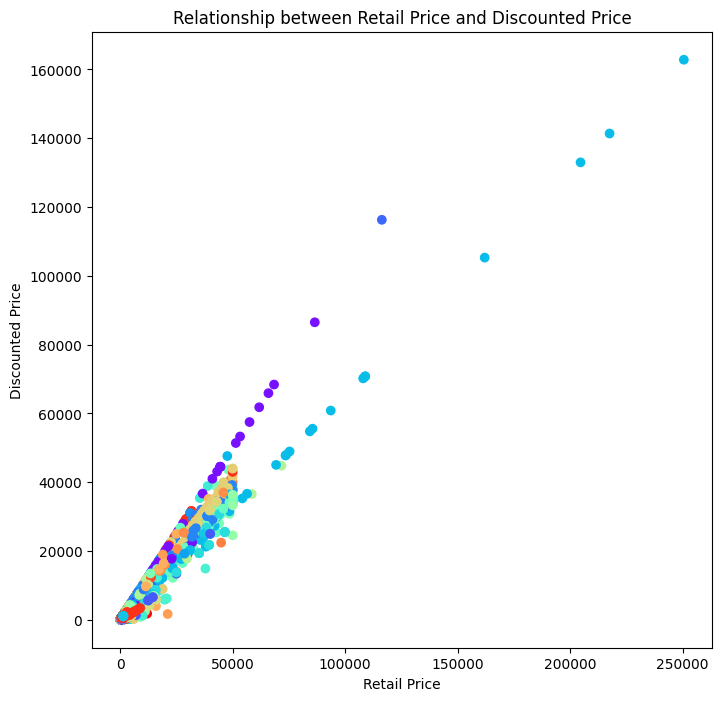

In [29]:
# Relationship between Retail Price and Discounted Price
plt.figure(figsize=(8,8))
plt.scatter(d['retail_price'],d['discounted_price'], c=d['product_name'], cmap='rainbow')
plt.xlabel('Retail Price')
plt.ylabel('Discounted Price')
plt.title('Relationship between Retail Price and Discounted Price')
plt.show()

In [31]:
# Plotting Brand and Overall rating
sns.lineplot(d['brand'], d['overall_rating'])

In [32]:
# Distribution of Ratings by Product Specification
fig.update_layout(width=600,  height=400)
fig = px.violin(d, x='product_specifications', y='overall_rating', color='overall_rating',
                box=True, points="all", hover_data=d.columns)

fig.update_layout(
    title='Distribution of Ratings by Product Specification',
    xaxis_title='Product Specification',
    yaxis_title='Overall Rating'
)

fig.show()

### Loading Data Features

In [33]:
# Dividing the data into x and y for train and test
x=d.drop(['is_FK_Advantage_product'], axis=1)
y=d[['is_FK_Advantage_product']]

In [34]:
# Splitting into train and test in the ratio of 75:25
x_train, x_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.25, random_state=42)

### Model Implementation

#### 1)Random Forest

In [35]:
rf = RandomForestClassifier(n_estimators = 40) 
rf.fit(x_train, y_train)
y_pred1 =rf.predict(x_test)
accuracy_score(y_pred1, y_test)

0.9849217638691323

In [36]:
# Printing the Classification report
print(classification_report(y_pred1, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3473
           1       0.43      0.81      0.56        42

    accuracy                           0.98      3515
   macro avg       0.71      0.90      0.78      3515
weighted avg       0.99      0.98      0.99      3515



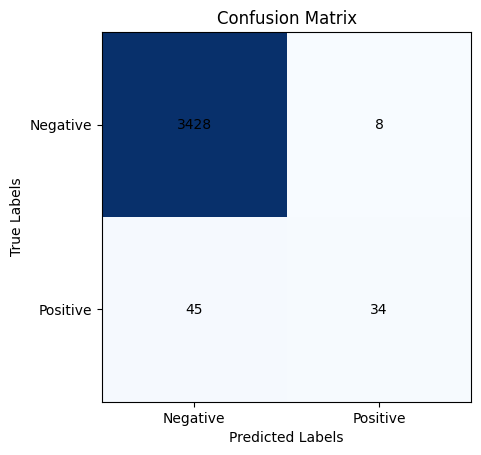

In [37]:
# Plotting the confusion matrix
confusion_matrix(y_test, y_pred1)
# y_test and y_pred1 are the actual and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred1)

# plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)

# set the plot labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])

# annotate the plot with the confusion matrix values
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.show()

#### Logistic Regression

In [38]:
lrc = LogisticRegression(random_state = 0)
lrc.fit(x_train, y_train)
y_pred2 = lrc.predict(x_test)
accuracy_score(y_pred2, y_test)

0.9772403982930299

In [39]:
# Printing the classification report
print(classification_report(y_pred2, y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3514
           1       0.00      0.00      0.00         1

    accuracy                           0.98      3515
   macro avg       0.50      0.49      0.49      3515
weighted avg       1.00      0.98      0.99      3515



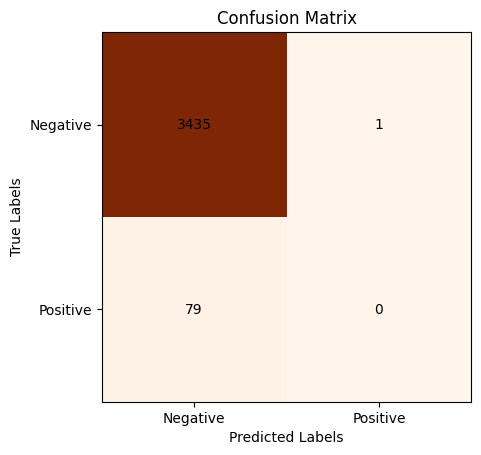

In [40]:
# Plotting Confusion Matrix
confusion_matrix(y_test, y_pred2)
# y_test and y_pred1 are the actual and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred2)

# plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Oranges)

# set the plot labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])

# annotate the plot with the confusion matrix values
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.show()

#### Decision Tree Implementation

In [41]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred3 = dt.predict(x_test)
accuracy_score(y_pred3, y_test)

0.9758179231863442

In [42]:
print(classification_report(y_pred3, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3425
           1       0.53      0.47      0.50        90

    accuracy                           0.98      3515
   macro avg       0.76      0.73      0.74      3515
weighted avg       0.97      0.98      0.98      3515



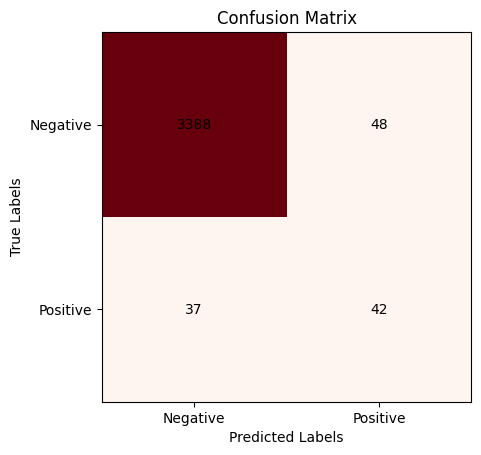

In [43]:
# y_test and y_pred1 are the actual and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred3)

# plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Reds)

# set the plot labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])

# annotate the plot with the confusion matrix values
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.show()

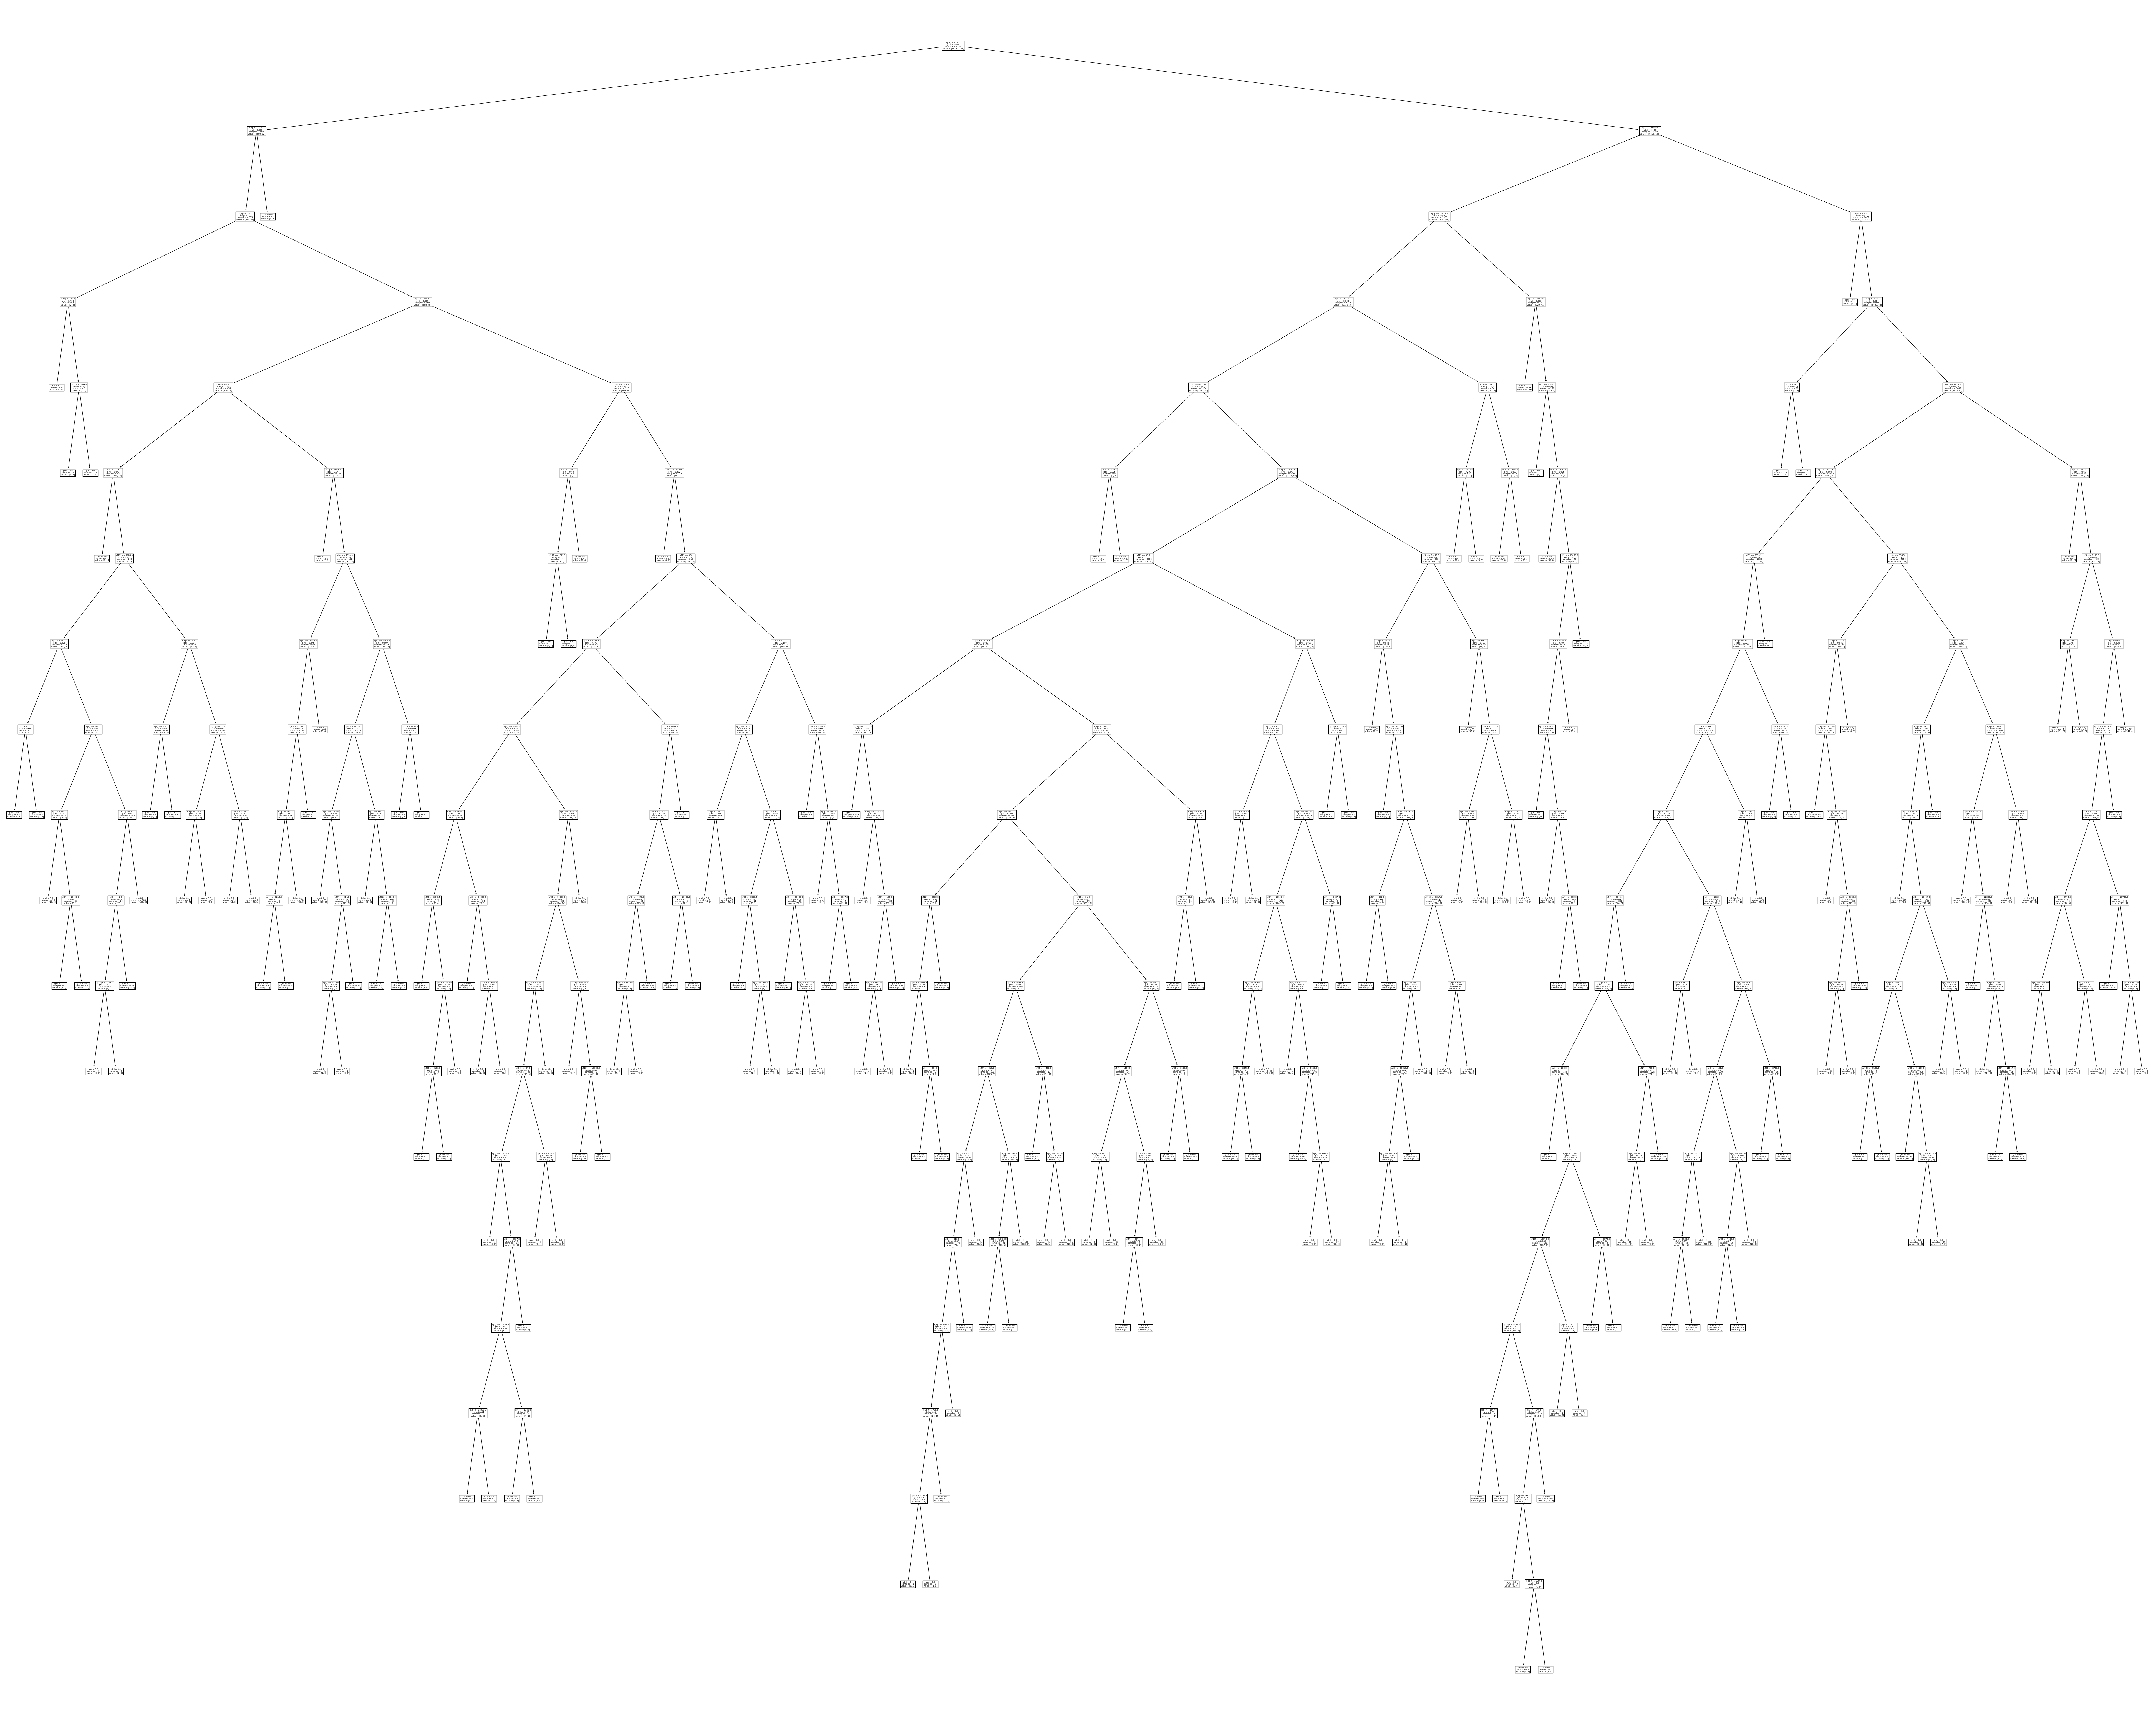

In [44]:
#tree.plot_tree(dt)
fig, ax = plt.subplots(figsize=(100, 80))
tree.plot_tree(dt, ax=ax)
plt.show()

### Data Augumentation Technique

### SMOTE Analysis

#### Logistic Regression

In [45]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(x_train, y_train['is_FK_Advantage_product'])
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res)
y_pred4 = lr1.predict(x_test)

print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.99      0.64      0.78      3436
           1       0.04      0.62      0.07        79

    accuracy                           0.64      3515
   macro avg       0.51      0.63      0.42      3515
weighted avg       0.97      0.64      0.76      3515



#### Decision Tree

In [46]:
dt1 = DecisionTreeClassifier()
dt1.fit(X_train_res, y_train_res)
y_pred5 = dt1.predict(x_test)
  
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3436
           1       0.26      0.48      0.34        79

    accuracy                           0.96      3515
   macro avg       0.63      0.73      0.66      3515
weighted avg       0.97      0.96      0.96      3515



#### Random Forest

In [47]:
rf1 = RandomForestClassifier() 
rf1.fit(X_train_res, y_train_res)
y_pred6 = rf1.predict(x_test)
  
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3436
           1       0.41      0.52      0.46        79

    accuracy                           0.97      3515
   macro avg       0.70      0.75      0.72      3515
weighted avg       0.98      0.97      0.97      3515



### Table for comparison of Metrics without Augumentation

In [48]:
from tabulate import tabulate

model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree']
report1 = classification_report(y_pred1, y_test, output_dict=True)
report2 = classification_report(y_pred2, y_test, output_dict=True)
report3 = classification_report(y_pred3, y_test, output_dict=True)

headers = ["Model", "precision", "recall", "f1-score", "support"]
table1 = [[k] + list(v.values()) for k, v in report1.items() if k in ('0', '1')]
table2 = [[k] + list(v.values()) for k, v in report2.items() if k in ('0', '1')]
table3 = [[k] + list(v.values()) for k, v in report3.items() if k in ('0', '1')]

table1.insert(0, [model_names[0], '', '', '', ''])
table2.insert(0, [model_names[1], '', '', '', ''])
table3.insert(0, [model_names[2], '', '', '', ''])

print(tabulate(table1, headers=headers, tablefmt="grid", floatfmt=".2f"))
print(tabulate(table2, headers=headers, tablefmt="grid", floatfmt=".2f"))
print(tabulate(table3, headers=headers, tablefmt="grid", floatfmt=".2f"))


+---------------------+---------------------+--------------------+--------------------+-----------+
| Model               | precision           | recall             | f1-score           | support   |
+=====================+=====================+====================+====================+===========+
| Logistic Regression |                     |                    |                    |           |
+---------------------+---------------------+--------------------+--------------------+-----------+
| 0                   | 0.9976717112922002  | 0.9870429023898647 | 0.9923288464321899 | 3473.0    |
+---------------------+---------------------+--------------------+--------------------+-----------+
| 1                   | 0.43037974683544306 | 0.8095238095238095 | 0.5619834710743802 | 42.0      |
+---------------------+---------------------+--------------------+--------------------+-----------+
+---------------+--------------------+--------------------+--------------------+-----------+
| Model

### Results after Augumentation

In [49]:
model_names = ['SMOTE Logistic Regression', 'SMOTE Random Forest', 'SMOTE Decision Tree']
report4 = classification_report(y_pred4, y_test, output_dict=True)
report5 = classification_report(y_pred5, y_test, output_dict=True)
report6 = classification_report(y_pred6, y_test, output_dict=True)

headers = ["Model", "precision", "recall", "f1-score", "support"]
table4 = [[k] + list(v.values()) for k, v in report4.items() if k in ('0', '1')]
table5 = [[k] + list(v.values()) for k, v in report5.items() if k in ('0', '1')]
table6 = [[k] + list(v.values()) for k, v in report6.items() if k in ('0', '1')]

table4.insert(0, [model_names[0], '', '', '', ''])
table5.insert(0, [model_names[1], '', '', '', ''])
table6.insert(0, [model_names[2], '', '', '', ''])

print(tabulate(table4, headers=headers, tablefmt="grid", floatfmt=".3f"))
print(tabulate(table5, headers=headers, tablefmt="grid", floatfmt=".4f"))
print(tabulate(table6, headers=headers, tablefmt="grid", floatfmt=".4f"))

+---------------------------+--------------------+---------------------+---------------------+-----------+
| Model                     | precision          | recall              | f1-score            | support   |
+===========================+====================+=====================+=====================+===========+
| SMOTE Logistic Regression |                    |                     |                     |           |
+---------------------------+--------------------+---------------------+---------------------+-----------+
| 0                         | 0.6388242142025611 | 0.9865168539325843  | 0.7754813637166579  | 2225.0    |
+---------------------------+--------------------+---------------------+---------------------+-----------+
| 1                         | 0.620253164556962  | 0.03798449612403101 | 0.07158509861212564 | 1290.0    |
+---------------------------+--------------------+---------------------+---------------------+-----------+
+---------------------+--------------

## Determining Best Prediction Model

In [50]:
mod1 = accuracy_score(y_pred1, y_test)
mod2 = accuracy_score(y_pred2, y_test)
mod3 = accuracy_score(y_pred3, y_test)
mod4 = accuracy_score(y_pred4, y_test)
mod5 = accuracy_score(y_pred5, y_test)
mod6 = accuracy_score(y_pred6, y_test)

In [51]:
d2 = {
    'Model Name': ['Random Forest', 'Logistic Regression', 
                   'Decision Tree', 'SMOTE_LR', 
                   'SMOTE_DT', 'SMOTE_RF'],
        'Accuracy Scores': [mod1, mod2, mod3, 
                            mod4, mod5, mod6]
}

In [52]:
Prediction_Models = pd.DataFrame(d2)
Prediction_Models

Model Name  Accuracy Scores
0        Random Forest         0.984922
1  Logistic Regression         0.977240
2        Decision Tree         0.975818
3             SMOTE_LR         0.638407
4             SMOTE_DT         0.958179
5             SMOTE_RF         0.972404

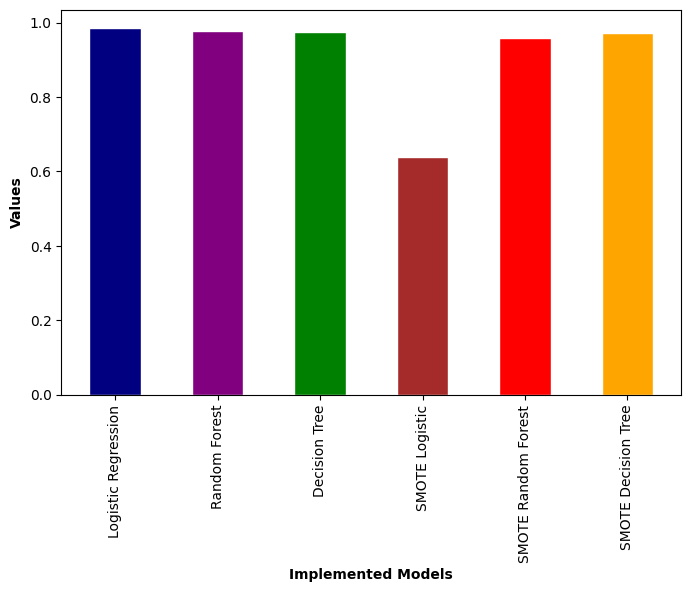

In [53]:
plt.figure(figsize=(8,5))

# set bar heights 
bars = [mod1, mod2, mod3, mod4, mod5, mod6]
 
# Set bar position on X axis
r = np.arange(len(bars))
 
# Make the plot
plt.bar(r, bars, color=['navy','purple','green','brown','red','orange'], edgecolor='white', width = 0.5)
 
# Add xticks 
plt.xlabel('Implemented Models', fontweight='bold')
plt.ylabel('Values',fontweight='bold')
plt.xticks(r, ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SMOTE Logistic', 'SMOTE Random Forest', 'SMOTE Decision Tree'], rotation = 90)
 
# Show graphic
plt.show()


### Plotting the metrics

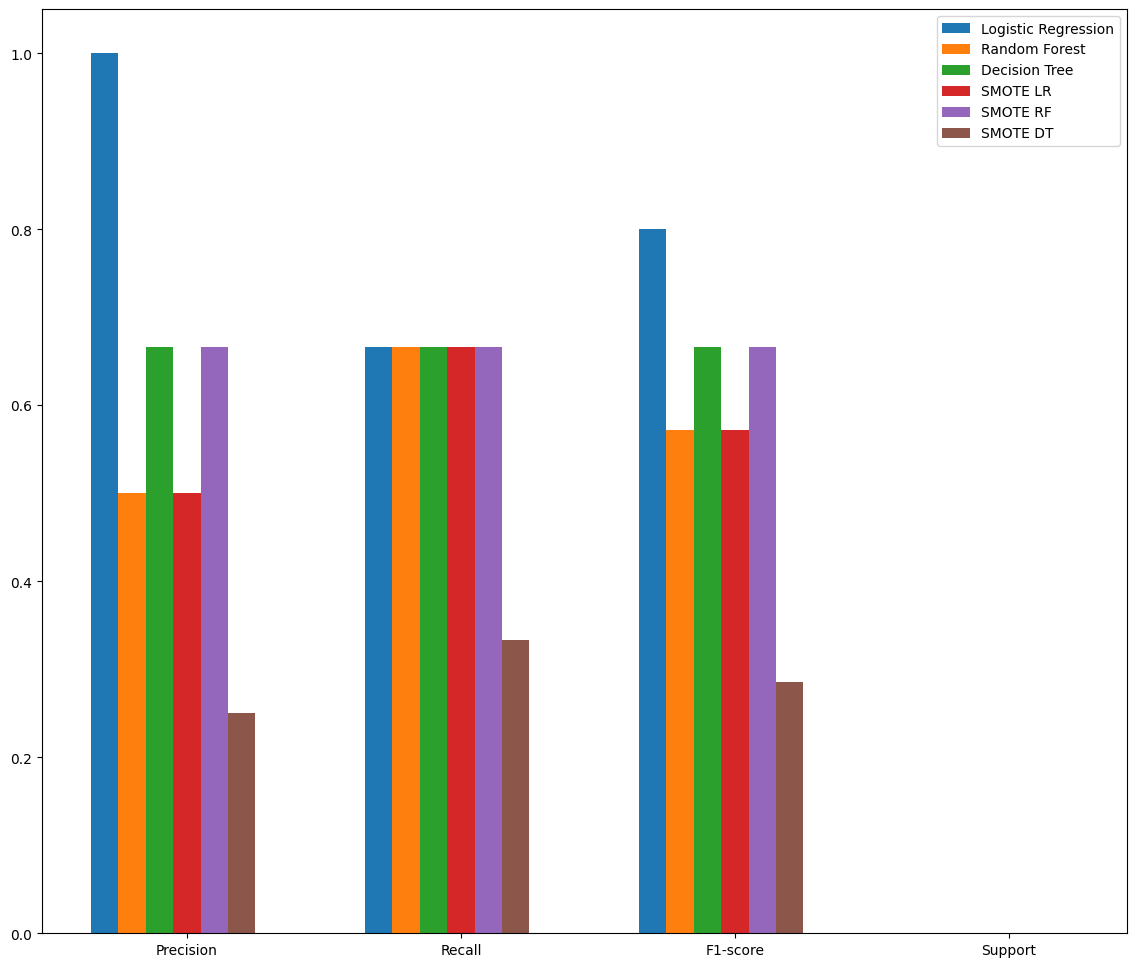

In [54]:
y_test = np.array([0, 1, 1, 0, 1, 0])
y_preds = [    np.array([0, 1, 0, 0, 1, 0]),
    np.array([1, 1, 0, 0, 1, 1]),
    np.array([0, 1, 1, 0, 0, 1]),
    np.array([1, 1, 1, 0, 0, 1]),
    np.array([0, 0, 1, 1, 1, 0]),
    np.array([1, 0, 1, 1, 0, 1])
]

precision_scores = []
recall_scores = []
f1_scores = []
support_scores = []

for i in range(len(y_preds)):
    p, r, f, s = precision_recall_fscore_support(y_test, y_preds[i], average='binary')
    if p is None:
        p = 0
    if r is None:
        r = 0
    if f is None:
        f = 0
    if s is None:
        s = 0
    precision_scores.append(p)
    recall_scores.append(r)
    f1_scores.append(f)
    support_scores.append(s)

labels = ['Precision', 'Recall', 'F1-score', 'Support']
x = np.arange(len(labels))
width = 0.1

fig, ax = plt.subplots(figsize=(14, 12))
for i in range(len(y_preds)):
    if i == 0:
        label = 'Logistic Regression'
    elif i == 1:
        label = 'Random Forest'
    elif i == 2:
        label = 'Decision Tree'
    elif i == 3:
        label = 'SMOTE LR'
    elif i == 4:
        label = 'SMOTE RF'
    elif i == 5:
        label = 'SMOTE DT'
    rects = ax.bar(x + i*width, [precision_scores[i], recall_scores[i], f1_scores[i], support_scores[i]], width, label=label)
ax.set_xticks(x + (len(y_preds)/2)*width)
ax.set_xticklabels(labels)
ax.legend()
plt.show()


In [55]:
# Load Data
sentence = df.loc[1]['description']
chunks = [(chunk.label(), ' '.join(c[0] for c in chunk))
          for sent in nltk.sent_tokenize(sentence)
          for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent)))
          if hasattr(chunk, 'label')]


In [56]:
# Count frequency of named entities
freq = nltk.FreqDist(chunk[1] for chunk in chunks if chunk[0] == 'ORGANIZATION')
freq

FreqDist({'Finish Color': 2, 'FabHomeDecor': 1, 'FabHomeDecor Fabric Double Sofa Bed': 1, 'Demo Installation': 1, 'Demo Details Installation': 1, 'Disclaimer': 1, 'Seller': 1})

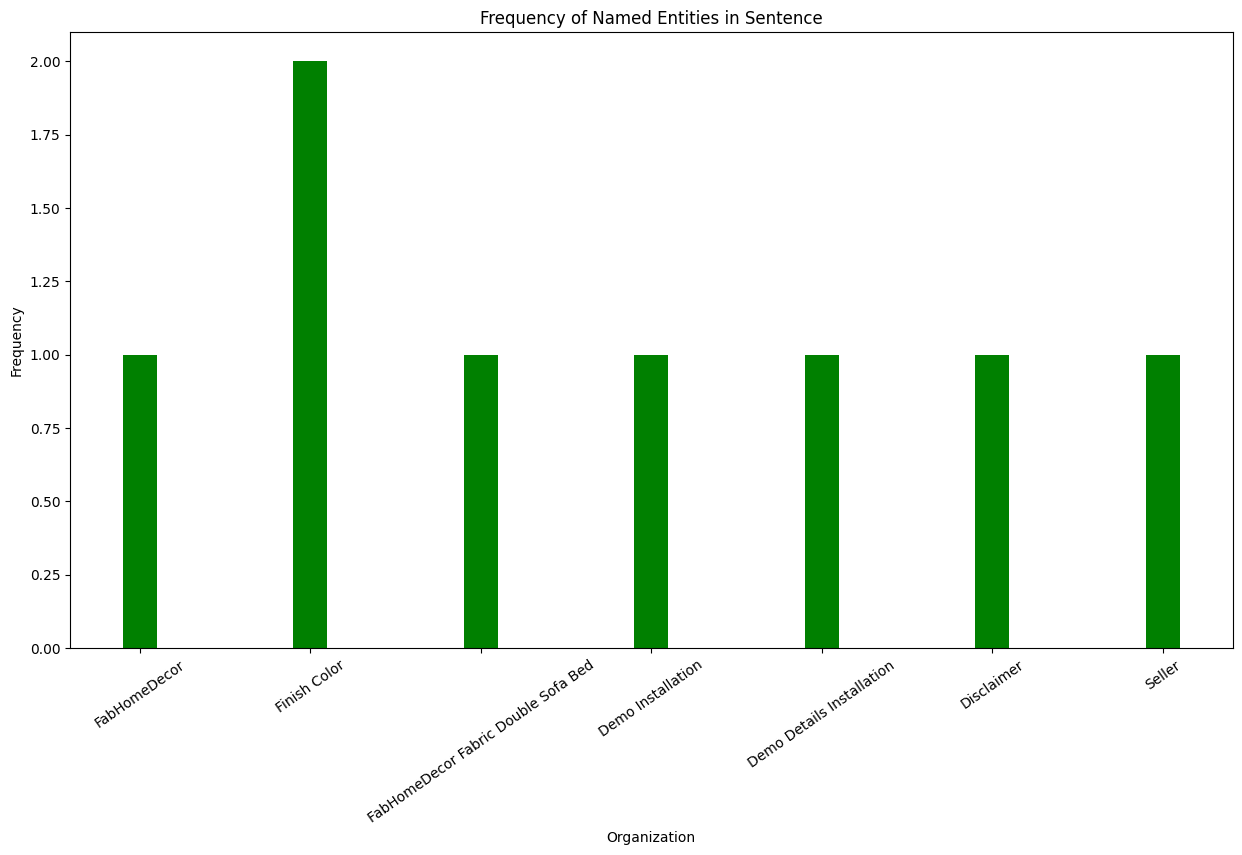

In [57]:
# Create bar chart of named entity frequencies
plt.figure(figsize=(15,8))
plt.bar(freq.keys(), freq.values(), color='green', width=0.2)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10, rotation = 35)
plt.xlabel('Organization')
plt.ylabel('Frequency')
plt.title('Frequency of Named Entities in Sentence')
plt.show()

<H3 style="color:teal;"><p style="font-family:Georgia;">Conclusion</H3>
<body>    
<p style="font-family:Georgia;">On the original dataset, Random Forest beat Logistic Regression and Decision Tree with 98.17% accuracy. Random Forest maintained its great performance with 97.24% accuracy following SMOTE analysis, while Logistic Regression had a poor performance with 64.03% accuracy. This demonstrates that Logistic Regression is less resistant to class imbalance than Random Forest. Although the accuracy of Random Forest marginally decreased following SMOTE analysis, this indicates that SMOTE may have contributed some noise to the dataset and that the original dataset may not have been overly imbalanced. Overall, Random Forest is the better approach in this case.</p>